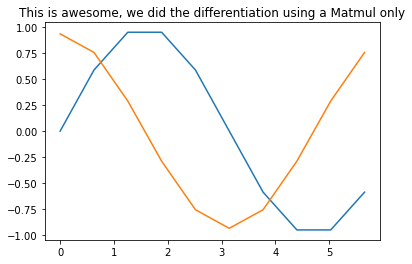

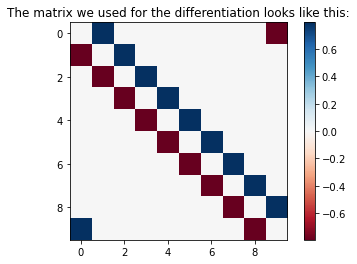

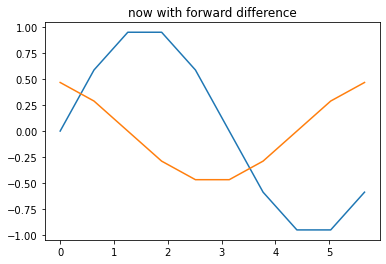

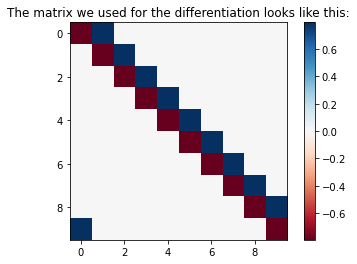

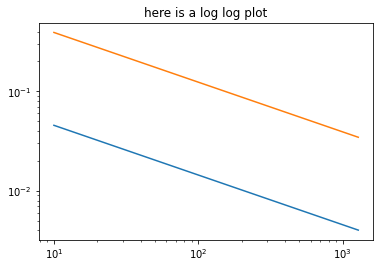

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

class Differentiator():
    """
    Making a cooler version of the differentiator class
    """
    def __init__( self, L_in ):
        
        self.L = L_in
        self.A = np.zeros((L,L)) 
        self.B = np.zeros((L,L))
        dx = 2*np.pi/self.L
        
        for i in range(L):
            self.A[i,(i+1)%L] =  1.0
            self.A[i,(i-1)%L] = -1.0
        self.A /= (2*dx)
        
        ## now for the exercise part
        for i in range(L):
            self.B[i,(i+1)%L] =  1.0
            self.B[i, i%L] = -1.0
        self.B /= (2*dx)
        
    def central_difference_1d(self, y):
        
        """
        This function belongs to the class.  Because we already did some setup
        in the __init__() method, it is now much simpler.
        """
        dy_dx = np.matmul(self.A,y) # or self.A @ y
        
        return dy_dx
    
    ## just copy-pasta hehe
    def forward_difference_1d(self, y):
        
        dy_dx = np.matmul(self.B, y)
        
        return dy_dx

def rootMeanSquare(L,dy_dx):
    ## pretty much the formula of rmse
    sum = 0
    for i in range(len(dy_dx)):
        sum += (yPrimeExact[i]-dy_dx[i])**2
    rms = np.sqrt(sum / L)
    return rms

##create an "instance" of the class
L = 10
diff = Differentiator(L)

x    = np.arange(0,1,1./L)*(2.*np.pi)
y    = np.sin(x)
yPrimeExact = np.cos(x) ## our exact derivaive

## what we actually want to plot
dy_dx_central = diff.central_difference_1d(y)
dy_dx_forward = diff.forward_difference_1d(y)


    
## Plotting time
plt.title("This is awesome, we did the differentiation using a Matmul only")
plt.plot(x,y)
plt.plot(x,dy_dx_central)
plt.show()

plt.title("The matrix we used for the differentiation looks like this:")
plt.imshow(diff.A, cmap='RdBu')
plt.colorbar()
plt.show()

plt.title("now with forward difference")
plt.plot(x,y)
plt.plot(x,dy_dx_forward)
plt.show()

plt.title("The matrix we used for the differentiation looks like this:")
plt.imshow(diff.B, cmap='RdBu')
plt.colorbar()
plt.show()



## looking at mean error
rms1 = [] ## root mean square error for the central diff
rms2 = [] ## root mean square error for the forward diff
valueL = [] ## storing our L values for plotting

## main loop
while L <= 1280:
    rms1.append(rootMeanSquare(L,dy_dx_central)) ## storing our values for each iteration
    rms2.append(rootMeanSquare(L,dy_dx_forward))
    valueL.append(L)
    L *= 2

plt.title("here is a log log plot")
plt.loglog(valueL, rms1)
plt.loglog(valueL, rms2)
plt.show()